### More with API's and Wrappers

This class focuses on more work with data visualization and `seaborn` as well as working with API's to retrieve data.  

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import pandas_datareader as pdr
import requests
import statsmodels.api as sm

In [2]:
#pip install statsmodels

**Warm Up**

Below a dataset from the `statsmodels` library is described and loaded.  Examine the dataset and 
using `seaborn` prepare the following plots. 

- `pairplot` with data colored by the `type` feature
- Side by side boxplot of `type` vs. `income` and barplot of average income by `type`

In [3]:
duncan_prestige = sm.datasets.get_rdataset("Duncan", "carData")

In [4]:
print(duncan_prestige.__doc__)

.. container::

   ====== ===============
   Duncan R Documentation
   ====== ===============

   .. rubric:: Duncan's Occupational Prestige Data
      :name: duncans-occupational-prestige-data

   .. rubric:: Description
      :name: description

   The ``Duncan`` data frame has 45 rows and 4 columns. Data on the
   prestige and other characteristics of 45 U. S. occupations in 1950.

   .. rubric:: Usage
      :name: usage

   ::

      Duncan

   .. rubric:: Format
      :name: format

   This data frame contains the following columns:

   type
      Type of occupation. A factor with the following levels: ``prof``,
      professional and managerial; ``wc``, white-collar; ``bc``,
      blue-collar.

   income
      Percentage of occupational incumbents in the 1950 US Census who
      earned $3,500 or more per year (about $36,000 in 2017 US dollars).

   education
      Percentage of occupational incumbents in 1950 who were high school
      graduates (which, were we cynical, we would 

In [5]:
duncan_df = duncan_prestige.data
duncan_df.head()

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


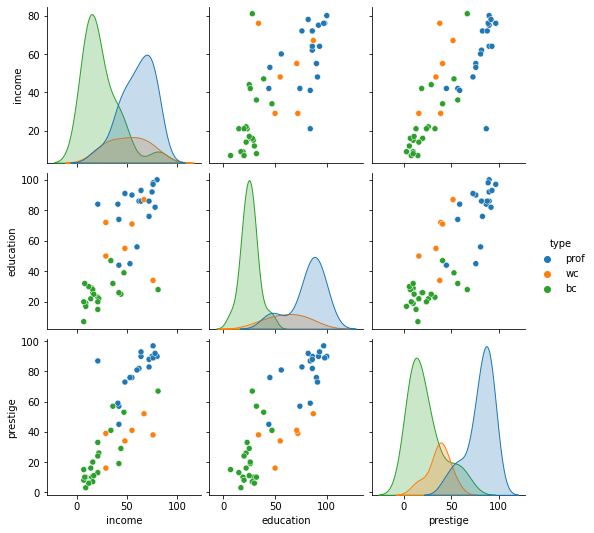

In [9]:
# pairplot by type
sns.pairplot(duncan_df, hue = 'type')

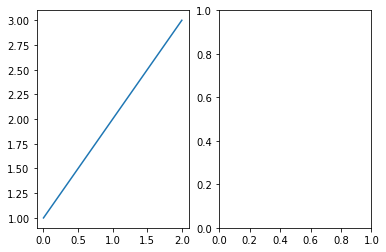

In [12]:
fig, ax = plt.subplots(1, 2)
ax[0].plot([1, 2, 3])

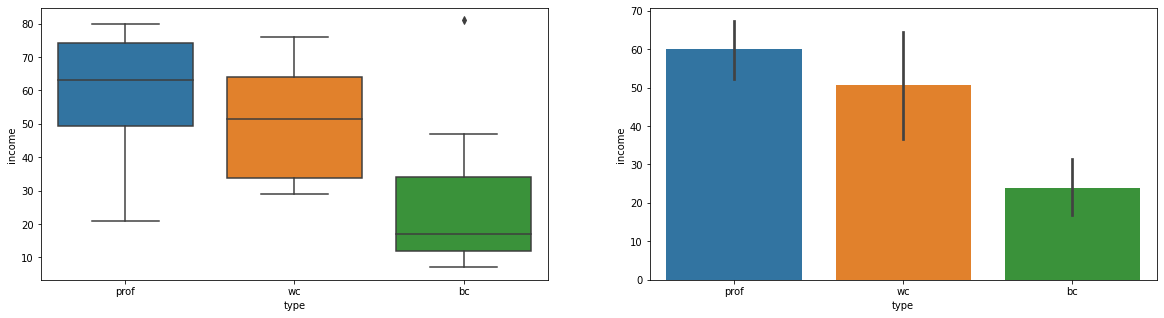

In [15]:
# boxplot of type vs. income
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
sns.boxplot(data=duncan_df, x="type", y="income", ax = ax[0]);
sns.barplot(data = duncan_df, x = "type", y = "income", ax = ax[1]);

In [ ]:
# barplot ? 
# sns.barplot()

<AxesSubplot: xlabel='type', ylabel='income'>

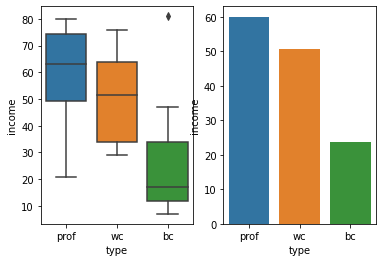

In [17]:
# barplot and boxplot together 
f, axes = plt.subplots(1, 2)
sns.boxplot(x="type",
                y="income",
                data=duncan_df,
                ax=axes[0])
sns.barplot(x = 'type',
            y = 'income',
            data = duncan_df, 
            errorbar = None,
            ax=axes[1])

#### API Review

![](https://res.cloudinary.com/di2vaxvhl/image/upload/v1545849277/HTTP_txch7g.png)

In [18]:
# url to pitchfork album reviews
pitch_url = 'https://pitchfork.com/reviews/albums/'

In [20]:
# make a request of the url
r = requests.get(pitch_url)
r

<Response [200]>

In [22]:
# examine the text of the response
r.text[:100]

'<!DOCTYPE html><html lang="en"><head><title data-react-helmet="true">New Albums &amp; Music Reviews '

#### URL's with data

Let's look over the PokeAPI with data about Pokemon [here](https://pokeapi.co/).

![](https://raw.githubusercontent.com/PokeAPI/media/master/logo/pokeapi_256.png)

In [23]:
#sample url
poke_url = 'https://pokeapi.co/api/v2/pokemon/ditto'

In [24]:
# make a request
response = requests.get(poke_url)
response

<Response [200]>

In [25]:
# extract json
ditto_data = response.json()

In [26]:
# examine the type of object
type(ditto_data)

dict

In [27]:
# what are the keys? 
ditto_data.keys()

dict_keys(['abilities', 'base_experience', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])

In [31]:
# extract their moves 
for ent in ditto_data['moves']:
    print(ent['move']['name'])

transform


**PROBLEM**

1. Extract information on the berry named `cheri`.  What is its firmness?
2. Extract information on the berry named `chesto`.  What is its firmness?
3. Write a function that takes in a berry name and returns its firmness.  Test your function with `pecha` berries. 

In [35]:
#make the url
cheri_url = 'https://pokeapi.co/api/v2/berry/cheri/'
#request
response = requests.get(cheri_url)
#look at dictionary
data = response.json()

data['firmness']['name']

'soft'

In [36]:
#make the url
chesto_url = 'https://pokeapi.co/api/v2/berry/chesto/'
#request
response = requests.get(chesto_url)
#look at dictionary
data = response.json()

data['firmness']['name']

'super-hard'

In [38]:
def berry_hardness(berry_name):
    #make the url
    berry_url = f'https://pokeapi.co/api/v2/berry/{berry_name}/'
    #request
    response = requests.get(berry_url)
    #look at dictionary
    data = response.json()

    return data['firmness']['name']

In [39]:
berry_hardness('pecha')

'very-soft'

#### Using Alpha Vantage

When we use an API, there is typically additional information required to extract specific data.  We used alpha vantage last time, we will do so again today.  The important idea here is understanding how the documentation helps you to format the URL and how we can use `requests` to help us to do so. Open up the docs [here](https://www.alphavantage.co/documentation/#intraday), and we will visit the url below to see the results.

- https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo


In [40]:
# intraday api endpoint url
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo'

In [41]:
# one approach with whole url
response = requests.get(url)

In [43]:
# examine output -- keys
response.json().keys()

dict_keys(['Meta Data', 'Time Series (5min)'])

In [44]:
# extract time series data
data = response.json()
data['Time Series (5min)']

{'2022-10-03 20:00:00': {'1. open': '121.5200',
  '2. high': '121.5200',
  '3. low': '121.5200',
  '4. close': '121.5200',
  '5. volume': '125'},
 '2022-10-03 19:50:00': {'1. open': '121.8700',
  '2. high': '121.8700',
  '3. low': '121.8700',
  '4. close': '121.8700',
  '5. volume': '100'},
 '2022-10-03 18:35:00': {'1. open': '121.5300',
  '2. high': '121.5300',
  '3. low': '121.5300',
  '4. close': '121.5300',
  '5. volume': '100'},
 '2022-10-03 17:45:00': {'1. open': '121.5500',
  '2. high': '121.5500',
  '3. low': '121.5500',
  '4. close': '121.5500',
  '5. volume': '100'},
 '2022-10-03 17:20:00': {'1. open': '121.5400',
  '2. high': '121.5400',
  '3. low': '121.5400',
  '4. close': '121.5400',
  '5. volume': '502'},
 '2022-10-03 17:05:00': {'1. open': '121.7000',
  '2. high': '121.7000',
  '3. low': '121.7000',
  '4. close': '121.7000',
  '5. volume': '250'},
 '2022-10-03 16:15:00': {'1. open': '121.5100',
  '2. high': '121.5200',
  '3. low': '121.4900',
  '4. close': '121.5100',
 

**Using Params**

- `function`
- `symbol`
- `interval`
- `api_key`

In [60]:
# another request
base_url = 'https://www.alphavantage.co/query'
response = requests.get(base_url, params={'function': 'TIME_SERIES_INTRADAY',
                                         'symbol': ['IBM', 'TSLA'],
                                         'interval': '5min',
                                         'apikey': 'LW9XCI6UYMQY5E14'})
response

<Response [200]>

In [61]:
# look at the results
data = response.json()
data

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume',
  '2. Symbol': 'TSLA',
  '3. Last Refreshed': '2022-10-03 20:00:00',
  '4. Interval': '5min',
  '5. Output Size': 'Compact',
  '6. Time Zone': 'US/Eastern'},
 'Time Series (5min)': {'2022-10-03 20:00:00': {'1. open': '243.9400',
   '2. high': '243.9500',
   '3. low': '243.7000',
   '4. close': '243.7000',
   '5. volume': '27269'},
  '2022-10-03 19:55:00': {'1. open': '243.7900',
   '2. high': '243.9400',
   '3. low': '243.6000',
   '4. close': '243.9200',
   '5. volume': '22377'},
  '2022-10-03 19:50:00': {'1. open': '243.7500',
   '2. high': '243.8400',
   '3. low': '243.6800',
   '4. close': '243.7700',
   '5. volume': '14649'},
  '2022-10-03 19:45:00': {'1. open': '243.6800',
   '2. high': '243.8200',
   '3. low': '243.6800',
   '4. close': '243.8000',
   '5. volume': '8550'},
  '2022-10-03 19:40:00': {'1. open': '243.7600',
   '2. high': '243.8400',
   '3. low': '243.6500',
   '4. close': '

In [50]:
# format time series data as DataFrame
ibm_data = pd.DataFrame(data['Time Series (5min)']).T
ibm_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2022-10-03 20:00:00 to 2022-09-30 16:25:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1. open    100 non-null    object
 1   2. high    100 non-null    object
 2   3. low     100 non-null    object
 3   4. close   100 non-null    object
 4   5. volume  100 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [ ]:
# look at the info


In [51]:
# rename the columns
ibm_data = pd.DataFrame(data['Time Series (5min)']).T
ibm_data.info()
cols = ['open', 'high', 'low', 'close', 'volume']
ibm_data.columns = cols

In [53]:
# format the data as floats using .astype()
ibm_data = ibm_data.astype('float')

In [55]:
# format the index as datetime
ibm_data.index = pd.to_datetime(ibm_data.index)

In [56]:
# plots of volume and close in 2 rows 1 column
ibm_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2022-10-03 20:00:00 to 2022-09-30 16:25:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    100 non-null    float64
 1   high    100 non-null    float64
 2   low     100 non-null    float64
 3   close   100 non-null    float64
 4   volume  100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB


**PROBLEM**

Examine the earnings for TSLA to GM using the earnings endpoint [here](https://www.alphavantage.co/documentation/#earnings).  Create a scatterplot that visualizes these comparisons.

**PROBLEM**

Use the consumer sentiment API [here](https://www.alphavantage.co/documentation/#consumer-sentiment).  Extract the dates and times and construct a DataFrame with appropriate datatypes and plot the results.

#### API Wrappers

Often, someone has written a library to wrap the API.  For example, there is an alpha vantage Python API wrapper:

- https://github.com/RomelTorres/alpha_vantage

Let's head over, install the library, and retrieve some intraday returns.

**PROBLEM**

Head over to New York City's Open Data Portal documentation on the 311 calls api [here](https://dev.socrata.com/foundry/data.cityofnewyork.us/erm2-nwe9).  Use the Socrata library to make a request and retrieve the 2000 most recent 311 calls.  Construct a barplot with counts of calls for each borough and one for each complaint type.